In [6]:
import os
import pickle

root_dir = '/home/jxm3/random/interpretable-autoprompting/'

hotflip_indices = pickle.load(open(os.path.join(root_dir, 'hotflip_grad_indices.p'), 'rb'))
hotflip_values = pickle.load(open(os.path.join(root_dir, 'hotflip_grad_values.p'), 'rb'))
hotflip_losses = pickle.load(open(os.path.join(root_dir, 'hotflip_losses.p'), 'rb'))

In [9]:
import pandas as pd

df = pd.DataFrame(zip(hotflip_indices, hotflip_values, hotflip_losses), columns=['token_idx', 'grad_value', 'loss'])
df.head()

,token_idx,grad_value,loss
0,37633,-0.759008,28.759841
1,19510,-0.713214,28.386833
2,861,-0.693773,28.453197
3,33096,-0.663077,28.686625
4,41359,-0.643015,28.380645


[Text(0.5, 0, 'gradient wrt word'),
 Text(0, 0.5, 'actual loss when word is substituted')]

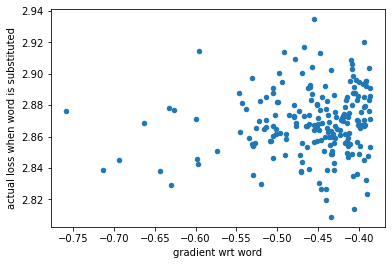

In [25]:
import math

df['loss_scaled'] = df['loss'] / 10
ax = df.plot(x='grad_value', y='loss_scaled', kind='scatter', logx=False, logy=False)
ax.set(xlabel="gradient wrt word", ylabel="actual loss when word is substituted")

In [64]:
import glob

In [69]:
glob.glob('../results/Sep_18_15_23_ahpzxrxhhnxp/*.p')

['../results/Sep_18_15_23_ahpzxrxhhnxp/hotflip_grads_data.p']

In [70]:
import pandas as pd
import pickle

data_raw = (
    pickle.load(open('../results/Sep_18_15_23_ahpzxrxhhnxp/hotflip_grads_data.p', 'rb'))
)
columns =  ['epoch', 'rank', 'prefix', 'token_id', 'token_grad', 'loss_with_this_token', 'n_correct_with_this_token']

data = []
epoch = -1
rank = 0
for d in data_raw:
    if d[0] == 0:
        epoch += 1
        rank = 0
    data.append((epoch, rank, *d[1:]))
    rank += 1
df = pd.DataFrame(data, columns=columns)

<AxesSubplot:xlabel='rank', ylabel='n_correct_with_this_token'>

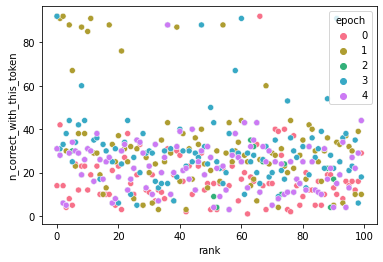

In [90]:
import seaborn as sns
sns.scatterplot(data=df, x='rank', y='n_correct_with_this_token', hue='epoch', palette=sns.color_palette('husl', n_colors=len(df.epoch.unique())))

<AxesSubplot:xlabel='token_grad', ylabel='n_correct_with_this_token'>

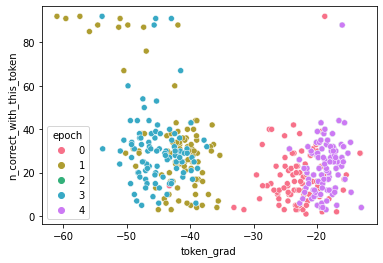

In [72]:
sns.scatterplot(data=df, x='token_grad', y='n_correct_with_this_token', hue='epoch', palette=sns.color_palette('husl', n_colors=len(df.epoch.unique())))

In [11]:
data

[]

In [84]:
import transformers
gpt_tokenizer = transformers.AutoTokenizer.from_pretrained('gpt2')

prefix_ids = []
for epoch in range(df['epoch'].max()+1):
    prefix_ids.append(df[df['epoch'] == epoch]['prefix'].iloc[0])
prefix_strs = [gpt_tokenizer.decode(_id) for _id in prefix_ids]

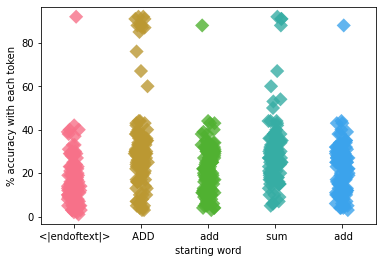

In [88]:
ax = sns.stripplot(
    data=df, y='n_correct_with_this_token', x='epoch', hue='epoch', size=10, alpha=0.8, marker="D",
)
ax.set_xticklabels(prefix_strs)
ax.set_xlabel("starting word")
ax.set_ylabel("% accuracy with each token")
ax.get_legend().remove()